In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

1. Cargue la base de datos riesgo_sobrecarga.csv a un DataFrame y mostrar 5 pimeras filas

In [57]:
data = pd.read_csv("data/riesgo_sobrecarga.csv")
data.head()

,Consumo_Promedio_kWh,Pico_Maximo_kW,Antiguedad_Instalacion_anios,Numero_Electrodomesticos,Uso_AireAcondicionado_horas,Uso_Calefaccion_horas,Variacion_Voltaje_pct,Carga_Nocturna_pct,Temperatura_Promedio_C,Riesgo_Sobrecarga
0,165.40,9.98,23.3,7,5.3,1.0,2.12,10.8,24.6,0
1,505.48,5.98,26.3,16,10.6,6.1,3.82,24.7,17.7,1
2,613.57,10.09,2.3,20,11.3,7.9,4.05,63.3,19.8,1
3,595.80,8.81,11.0,12,2.2,5.8,3.54,84.5,20.3,1
4,580.32,4.89,1.6,9,11.1,9.7,4.34,10.2,20.5,1


In [58]:
data.shape

(480, 10)

In [59]:
data.describe()

,Consumo_Promedio_kWh,Pico_Maximo_kW,Antiguedad_Instalacion_anios,Numero_Electrodomesticos,Uso_AireAcondicionado_horas,Uso_Calefaccion_horas,Variacion_Voltaje_pct,Carga_Nocturna_pct,Temperatura_Promedio_C,Riesgo_Sobrecarga
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,432.365792,6.590563,17.688750,13.495833,5.325000,4.657917,3.816375,48.683333,21.736667,0.500000
std,126.573774,2.689302,11.056345,5.419364,3.440602,2.797229,2.040976,23.111744,6.016084,0.500522
min,101.130000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,10.000000,5.000000,0.000000
25%,346.495000,4.765000,7.700000,9.000000,2.275000,2.200000,2.445000,28.400000,17.700000,0.000000
50%,430.900000,6.495000,17.350000,13.000000,4.900000,4.650000,3.830000,46.450000,21.900000,0.500000
75%,520.250000,8.322500,26.900000,18.000000,8.200000,6.900000,5.070000,68.025000,25.900000,1.000000
max,816.960000,14.220000,39.900000,24.000000,12.000000,10.000000,11.430000,89.900000,40.000000,1.000000


2. Calcule la proporción de cada clase de la variable objetivo

In [60]:
data["Riesgo_Sobrecarga"].value_counts(normalize=True)

Riesgo_Sobrecarga
0    0.5
1    0.5
Name: proportion, dtype: float64

In [61]:
data.columns

Index(['Consumo_Promedio_kWh', 'Pico_Maximo_kW',
       'Antiguedad_Instalacion_anios', 'Numero_Electrodomesticos',
       'Uso_AireAcondicionado_horas', 'Uso_Calefaccion_horas',
       'Variacion_Voltaje_pct', 'Carga_Nocturna_pct', 'Temperatura_Promedio_C',
       'Riesgo_Sobrecarga'],
      dtype='object')

3. Defina variables predictoras y variable objetivo

In [62]:
X=data.iloc[:,0:9]
X.head()

,Consumo_Promedio_kWh,Pico_Maximo_kW,Antiguedad_Instalacion_anios,Numero_Electrodomesticos,Uso_AireAcondicionado_horas,Uso_Calefaccion_horas,Variacion_Voltaje_pct,Carga_Nocturna_pct,Temperatura_Promedio_C
0,165.40,9.98,23.3,7,5.3,1.0,2.12,10.8,24.6
1,505.48,5.98,26.3,16,10.6,6.1,3.82,24.7,17.7
2,613.57,10.09,2.3,20,11.3,7.9,4.05,63.3,19.8
3,595.80,8.81,11.0,12,2.2,5.8,3.54,84.5,20.3
4,580.32,4.89,1.6,9,11.1,9.7,4.34,10.2,20.5


In [63]:
Y=data.iloc[:,9]
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: Riesgo_Sobrecarga, dtype: int64

4. Realizar un split train-test (80% – 20%) estratificado.

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

Crear pipelines para:
* KNN
* SVC
* Decision Tree
* Naive Bayes

In [65]:
pipelines = {
    "KNN": Pipeline([("scaler", StandardScaler()),
                     ("model", KNeighborsClassifier())]),
    "SVC": Pipeline([("scaler", StandardScaler()),
                     ("model", SVC())]),
    "Tree": Pipeline([("model", DecisionTreeClassifier())]),
    "Bayes": Pipeline([("model", GaussianNB())])
}

6. Crear el param_grid adecuado para cada modelo.

In [66]:
param_grids = {
    "KNN": {
        "model__n_neighbors": [4,5,7,8,9,10],
        "model__weights": ["uniform", "distance"]
    },
    "SVC": {
        "model__C": [0.1,1,10,100],
        "model__kernel": ["rbf", "linear"]
    },
    "Tree": {
        "model__max_depth": [None,3,5,10,15]
    },
    "Bayes": {
        "model__var_smoothing": [1e-10,1e-9,1e-8,1e-7,1e-6]
    }
}

7. Usar validación cruzada interna (cv=5).

In [67]:
cv_inner=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

8. Construir tabla con:
* Mejores hiperparámetros
* CV Accuracy


In [68]:
best_models={}
resuls={}
for name in pipelines:
    grid=GridSearchCV(estimator=pipelines[name], param_grid=param_grids[name],cv=cv_inner, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, Y_train)
    best_models[name]=grid.best_estimator_
    resuls[name]={"Best params": grid.best_params_, "CV Accuracy": grid.best_score_}

In [69]:
for name, model in best_models.items():
    y_pred=model.predict(X_test)
    test_acc=accuracy_score(Y_test,y_pred)
    resuls[name]["Test accuracy"]=test_acc

9. Evaluar test externo y obtener accuracy y classification report.

In [70]:
pd.set_option("display.max_colwidth", None)
result_data=pd.DataFrame(resuls).T
result_data

,Best params,CV Accuracy,Test accuracy
KNN,"{'model__n_neighbors': 8, 'model__weights': 'distance'}",0.775974,0.666667
SVC,"{'model__C': 1, 'model__kernel': 'rbf'}",0.804682,0.677083
Tree,{'model__max_depth': 3},0.744839,0.677083
Bayes,{'model__var_smoothing': 1e-10},0.791558,0.739583


10. ¿Cuál modelo sería el adecuado para esta base de datos en particular? Justifique
numéricamente su respuesta.

*Bayes*, porque aunque SVC tenga mas alto el accuracy, ya en los datos que el modelo no conoce se comportó mejor en Bayes.

KNN
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        48
           1       0.71      0.56      0.63        48

    accuracy                           0.67        96
   macro avg       0.67      0.67      0.66        96
weighted avg       0.67      0.67      0.66        96



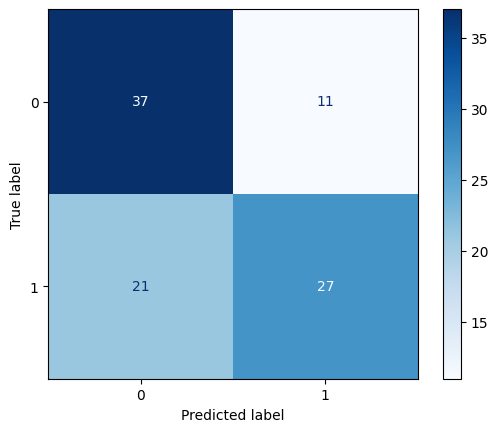

SVC
              precision    recall  f1-score   support

           0       0.64      0.81      0.72        48
           1       0.74      0.54      0.63        48

    accuracy                           0.68        96
   macro avg       0.69      0.68      0.67        96
weighted avg       0.69      0.68      0.67        96



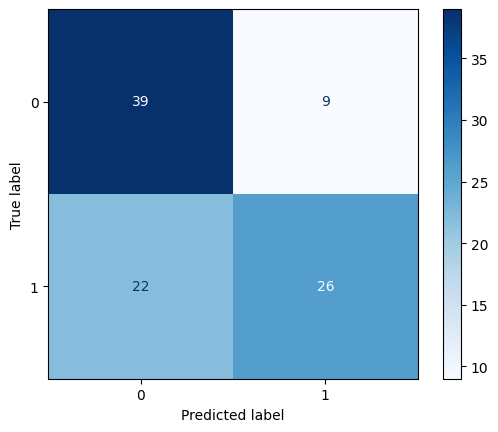

Tree
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        48
           1       0.67      0.69      0.68        48

    accuracy                           0.68        96
   macro avg       0.68      0.68      0.68        96
weighted avg       0.68      0.68      0.68        96



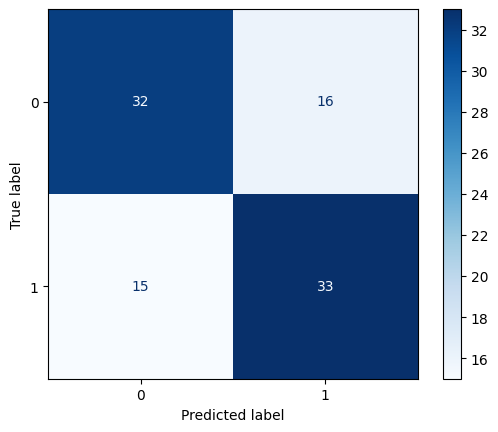

Bayes
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.79      0.65      0.71        48

    accuracy                           0.74        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.75      0.74      0.74        96



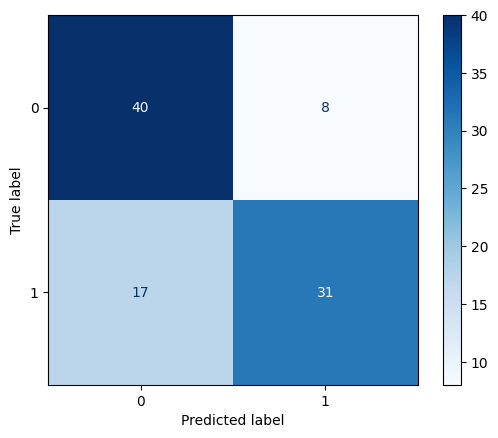

In [71]:
for name, model in best_models.items():
    y_pred=model.predict(X_test)
    print(name)
    print(classification_report(Y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap="Blues")
    plt.show()